In [2]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq

# Load environment variables
os.environ["LANGSMITH_PROJECT"] = "AgenticAIworkspace"
load_dotenv()

groq_key = os.getenv("GROQ_API_KEY")

# Initialize the LLM
llm = ChatGroq(api_key=groq_key, model="llama-3.1-8b-instant")

In [ ]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from IPython.display import display, Image

# GraphState
class State(TypedDict):
    topic: str
    story: str
    improved_story: str
    final_story: str

def generate_story(state: State):
    msg= llm.invoke(f"Write a one sentence of story premis by {state['topic']}")
    return {"story": msg.content}

def check_conflict(state: State):
    if "?" in state["story"] or "!" in state["story"]:
        return "Fail"
    return "Pass"

def improved_story(state: State):
    msg = llm.invoke(f"Enhance the story premis with vivid details: {state['story']}")
    return {"improved_story": msg.content}

def polish_story(state: State):
    msg = llm.invoke(f"Add an unexpected twist to this story premise: {state['improved_story']}")
    return {"final_story": msg.content}

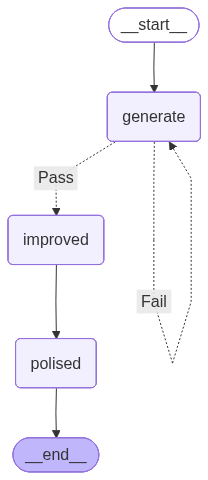

In [6]:
# Build the graph
graph = StateGraph(State)
graph.add_node('generate', generate_story)
graph.add_node('improved', improved_story)
graph.add_node('polised', polish_story)

# add edge's
graph.add_edge(START, "generate")
graph.add_conditional_edges("generate", check_conflict, {"Pass": "improved", "Fail": "generate"})
graph.add_edge("improved", "polised")
graph.add_edge("polised", END)

# compile the builder
complied_graph = graph.compile()
graph_images = complied_graph.get_graph().draw_mermaid_png()

display(Image(graph_images))

In [7]:
# Run the graph
state = {"topic": "Agenitc AI System"}
result = complied_graph.invoke(state)

result

{'topic': 'Agenitc AI System',
 'story': 'In the year 2154, a brilliant and reclusive scientist named Maya discovers a way to communicate with parallel universes, but her first contact is an eerie echo from a reality where humanity has long since succumbed to an apocalyptic catastrophe.',
 'improved_story': 'In the year 2154, the sprawling metropolis of New Eden pierced the sky like a shard of splintered glass, its towering spires and iridescent domes a testament to human ingenuity and technological prowess. Amidst this labyrinthine city, a reclusive scientist named Dr. Maya Singh resided in a foreboding, high-rise abode shrouded in an aura of mystery. Her existence was a solitary one, devoted to unraveling the secrets of the multiverse.\n\nMaya\'s laboratory, a maze of gleaming workstations and holographic displays, was her sanctuary. Here, she had spent years pouring over theories and conducting experiments, driven by an insatiable curiosity about the cosmos. Her obsession had finall